In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
%run load_data.py

In [4]:
raw_train.shape

(878049, 9)

In [5]:
raw_train.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [6]:
cat = raw_train.groupby('Category').size()
#raw_train.Category.groupby(level=0).count()

In [7]:
cat.sort()

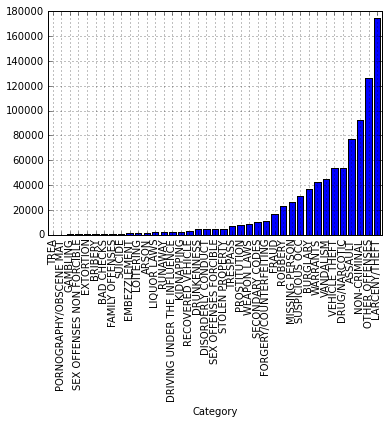

In [8]:
cat.plot(kind='bar')

In [9]:
# take a copy of the raw training set
year_based = raw_train

In [14]:
year_based.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [15]:
year_based['Dates'] = pd.to_datetime(year_based['Dates'])

In [16]:
year_based.dtypes

Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
dtype: object

In [18]:
year_based.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [28]:
year_based.Dates[0].year

2015

In [29]:
year_based.shape

(878049, 9)

In [30]:
# Create a column with only Year
year_based['Year'] = year_based['Dates'].map(lambda x: x.year)

In [31]:
year_based.shape

(878049, 10)

In [32]:
year_based.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015


In [35]:
yearly_group = year_based.groupby(['Year', 'Category']).size()

In [51]:
yearly_group

Year  Category                   
2003  ARSON                           154
      ASSAULT                        6555
      BAD CHECKS                       69
      BRIBERY                          12
      BURGLARY                       3017
      DISORDERLY CONDUCT              407
      DRIVING UNDER THE INFLUENCE     135
      DRUG/NARCOTIC                  4875
      DRUNKENNESS                     333
      EMBEZZLEMENT                    130
      EXTORTION                        14
      FAMILY OFFENSES                  60
      FORGERY/COUNTERFEITING         1141
      FRAUD                          1616
      GAMBLING                         14
...
2015  PROSTITUTION                   46
      ROBBERY                       722
      RUNAWAY                        26
      SECONDARY CODES               402
      SEX OFFENSES FORCIBLE         159
      SEX OFFENSES NON FORCIBLE       4
      STOLEN PROPERTY               161
      SUICIDE                         8
      SUSPIC

In [45]:
# Number of crimes occured in 2003
yearly_group[2003]

Category
ARSON                            154
ASSAULT                         6555
BAD CHECKS                        69
BRIBERY                           12
BURGLARY                        3017
DISORDERLY CONDUCT               407
DRIVING UNDER THE INFLUENCE      135
DRUG/NARCOTIC                   4875
DRUNKENNESS                      333
EMBEZZLEMENT                     130
EXTORTION                         14
FAMILY OFFENSES                   60
FORGERY/COUNTERFEITING          1141
FRAUD                           1616
GAMBLING                          14
KIDNAPPING                       163
LARCENY/THEFT                  12990
LIQUOR LAWS                      137
LOITERING                        100
MISSING PERSON                  1861
NON-CRIMINAL                    6566
OTHER OFFENSES                 10614
PORNOGRAPHY/OBSCENE MAT            1
PROSTITUTION                     923
ROBBERY                         1615
RUNAWAY                          182
SECONDARY CODES              

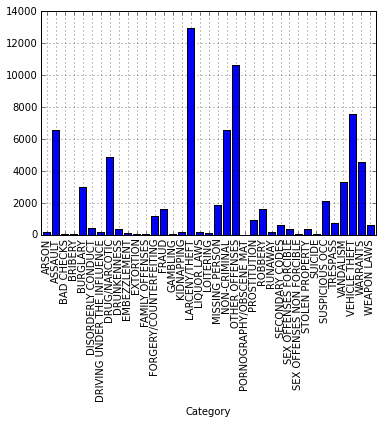

In [50]:
yearly_group[2003].plot(kind='bar')

In [62]:
cat_year_group = year_based.groupby(['Category', 'Year'])
cat_year_group_size = cat_year_group.size()

In [63]:
cat_year_group_size

Category  Year
ARSON     2003     154
          2004     147
          2005     106
          2006     102
          2007     118
          2008     134
          2009     119
          2010     104
          2011      98
          2012     122
          2013     125
          2014     115
          2015      69
ASSAULT   2003    6555
          2004    6467
...
WARRANTS     2014    3435
             2015    1189
WEAPON LAWS  2003     605
             2004     634
             2005     679
             2006     678
             2007     641
             2008     712
             2009     701
             2010     644
             2011     676
             2012     760
             2013     736
             2014     775
             2015     314
Length: 491, dtype: int64

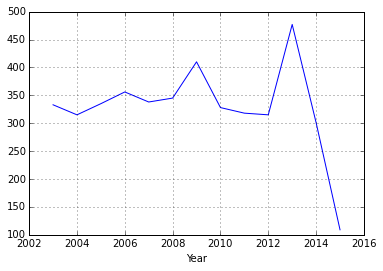

In [74]:
# number of cases of DRUNKENNESS over years
cat_year_group_size['DRUNKENNESS'].plot(kind='line')

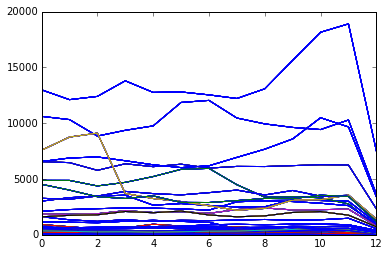

In [86]:
for key, group in cat_year_group:
    # print group['Year']
    #plt.plot(group['Year'], label=key)
    #print key, group.shape[0]
    #print key[0]
    plt.plot(cat_year_group_size[key[0]])